## KNN Practice

### A)
Read Data from your disk and make predictions using the KNN Classifier.

In [1]:
# importing packages

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# read data

original_df = pd.read_csv('breast-cancer-wisconsin.data.txt')
cancer_df = pd.read_csv('breast-cancer-wisconsin.data.txt')

In [3]:
cancer_df

,id,par1,par2,par3,par4,par5,par6,par7,par8,par9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
# preprocessing

cancer_df.replace('?', -99999, inplace=True)
cancer_df.drop(columns=['id'], inplace=True)

In [5]:
# identify X and y

X = np.array(cancer_df.drop(columns=['class']))
y = np.array(cancer_df['class'])

In [6]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [7]:
# training data
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9714285714285714


In [9]:
data = np.array([4,3,3,2,1,2,1,1,2])
prediction = clf.predict(data.reshape(1,-1))
print(prediction)

[2]


## Task 1
Change number of neighbors
(ie, K) and test the accuracy of
both training and testing - print
results.

In [12]:
clf_2 = KNeighborsClassifier(n_neighbors=2)
clf_2.fit(X_train, y_train)
clf_3 = KNeighborsClassifier(n_neighbors=3)
clf_3.fit(X_train, y_train)
clf_4 = KNeighborsClassifier(n_neighbors=4)
clf_4.fit(X_train, y_train)
clfs = [clf_2, clf_3, clf_4]

In [13]:
for i in clfs:
    print(i.score(X_train, y_train))
    print(i.score(X_test, y_test))


0.9770992366412213
0.96
0.9770992366412213
0.9771428571428571
0.9751908396946565
0.9828571428571429


## Task 2
Try NOT to drop the ‘id’
column then evaluate both
training and testing outcomes
(scores).

In [16]:
task_2_df = original_df.copy()

task_2_df.replace('?', -99999, inplace=True)
X_task_2 = np.array(task_2_df.drop(columns=['class']))
y_task_2 = np.array(task_2_df['class'])

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_task_2, y_task_2, random_state=0)

In [21]:
clf_task_2 = KNeighborsClassifier(n_neighbors=2)
clf_task_2.fit(X_train_2, y_train_2)

KNeighborsClassifier(n_neighbors=2)

In [22]:
print(clf_task_2.score(X_train_2, y_train_2))
print(clf_task_2.score(X_test_2, y_test_2))


0.8110687022900763
0.6171428571428571


You may notice that both scores
are less accurate, explain why?

id is not related to anything except identfication

## Task 3
Explore other parameters of
the KNeighborsClassifier
function, for instance, can we
apply Manhattan distance
instead of the Euclidean. If so,
test its use and compare with
the results you had earlier.

In [27]:
clf_2_task = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
clf_2_task.fit(X_train, y_train)
clf_3_task = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clf_3_task.fit(X_train, y_train)
clf_4_task = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
clf_4_task.fit(X_train, y_train)
clfs_task = [clf_2_task, clf_3_task, clf_4_task]

In [33]:
for i in clfs_task:
    print('train:',i.score(X_train, y_train))
    print('test:',i.score(X_test, y_test))

train: 0.9809160305343512
test: 0.9542857142857143
train: 0.982824427480916
test: 0.9714285714285714
train: 0.9770992366412213
test: 0.9771428571428571


### B)
Read Data from your disk and make predictions using the KNN Classifier.

In [34]:
training_acc = []
test_acc = []
# try n_neighbors from 1 to 10
n_neighbors_settings = range(1,11)

for n_neighbors in n_neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_acc.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_acc.append(clf.score(X_test, y_test))

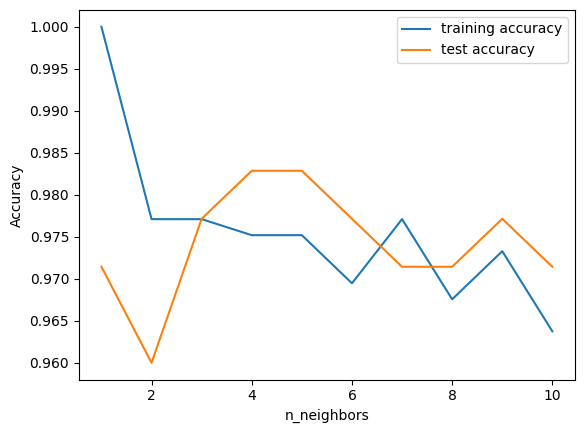

In [36]:
plt.plot(n_neighbors_settings, training_acc, label='training accuracy')
plt.plot(n_neighbors_settings, test_acc, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

1) If you run the code above you will produce a figure - print it or save it and discuss/explore what
it means. What is your understanding from the produced figure?

n_neigbors = 5 gives the best test accuracy